<a href="https://colab.research.google.com/github/nusc2016/Unit-1-Build/blob/master/Aaron_Huizenga_DS1_Unit1_Build_Week.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## WEATHER - The true effect it has had on the game of football over the past 50yrs!

- The question as always been, does weather truly have an effect on the outcome, in what is considered America's sport? 
 

#### As you read through this you will see the importation of a raw data set from an excel spread sheet that shows the effect that weather has on the game of football. The goal is to be as precise and clear as possible. So enjoy the journey.
#### But before I begin, I want to import everything I may need for this project, as it will be vital in making sure the story is clear as day.

In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### Now that I have imported everything I need I will now import the spread sheet and save it to the proper format (.csv).

In [0]:
from google.colab import files
files.upload()

Saving NFL_Weather.csv to NFL_Weather.csv


{'NFL_Weather.csv': b'id,home_team,home_score,away_team,away_score,temperature,wind_chill,humidity,wind_mph,weather,date\r\n196009230ram,Los Angeles Rams,21,St. Louis Cardinals,43,66,,78%,8,66 degrees- relative humidity 78%- wind 8 mph,9/23/1960\r\n196009240dal,Dallas Cowboys,28,Pittsburgh Steelers,35,72,,80%,16,72 degrees- relative humidity 80%- wind 16 mph,9/24/1960\r\n196009250gnb,Green Bay Packers,14,Chicago Bears,17,60,,76%,13,60 degrees- relative humidity 76%- wind 13 mph,9/25/1960\r\n196009250sfo,San Francisco 49ers,19,New York Giants,21,72,,44%,10,72 degrees- relative humidity 44%- wind 10 mph,9/25/1960\r\n196009250clt,Baltimore Colts,20,Washington Redskins,0,62,,80%,9,62 degrees- relative humidity 80%- wind 9 mph,9/25/1960\r\n196009250phi,Philadelphia Eagles,24,Cleveland Browns,41,61,,77%,9,61 degrees- relative humidity 77%- wind 9 mph,9/25/1960\r\n196009300dal,Dallas Cowboys,25,Philadelphia Eagles,27,77,,50%,11,77 degrees- relative humidity 50%- wind 11 mph,9/30/1960\r\n19601

#### I will now start the process of cleaning the data so that I can create a visualization to make my objective clear. The following functions will allow the dataset to be read in. We will take a look at the first five rows, and then do the same to the last five rows. 

In [0]:
df = pd.read_csv('NFL_Weather.csv')
df.head(5)

,id,home_team,home_score,away_team,away_score,temperature,wind_chill,humidity,wind_mph,weather,date
0,196009230ram,Los Angeles Rams,21,St. Louis Cardinals,43,66,NaN,78%,8.0,66 degrees- relative humidity 78%- wind 8 mph,9/23/1960
1,196009240dal,Dallas Cowboys,28,Pittsburgh Steelers,35,72,NaN,80%,16.0,72 degrees- relative humidity 80%- wind 16 mph,9/24/1960
2,196009250gnb,Green Bay Packers,14,Chicago Bears,17,60,NaN,76%,13.0,60 degrees- relative humidity 76%- wind 13 mph,9/25/1960
3,196009250sfo,San Francisco 49ers,19,New York Giants,21,72,NaN,44%,10.0,72 degrees- relative humidity 44%- wind 10 mph,9/25/1960
4,196009250clt,Baltimore Colts,20,Washington Redskins,0,62,NaN,80%,9.0,62 degrees- relative humidity 80%- wind 9 mph,9/25/1960


In [0]:
df.tail(5)

,id,home_team,home_score,away_team,away_score,temperature,wind_chill,humidity,wind_mph,weather,date
11187,201312290nwe,New England Patriots,34,Buffalo Bills,20,39,NaN,100%,8.0,39 degrees- relative humidity 100%- wind 8 mph,12/29/2013
11188,201312290atl,Atlanta Falcons,20,Carolina Panthers,21,0,0.0,NaN,NaN,0 degrees- no wind- wind chill 0,12/29/2013
11189,201312290pit,Pittsburgh Steelers,20,Cleveland Browns,7,40,NaN,93%,5.0,40 degrees- relative humidity 93%- wind 5 mph,12/29/2013
11190,201312290rai,Oakland Raiders,14,Denver Broncos,34,70,0.0,16%,8.0,70 degrees- relative humidity 16%- wind 8 mph-...,12/29/2013
11191,201312290mia,Miami Dolphins,7,New York Jets,20,79,0.0,84%,12.0,79 degrees- relative humidity 84%- wind 12 mph...,12/29/2013


#### Now that we have taken a good look into the data, you can see tha there are some NaN values(aka - missing values). Over the next few cells, I will remove values and replace them with 0, I will remove columns, and I will rename them to make it easier to read.

In [0]:
df.drop(columns=['id', 'wind_chill', 'weather'])

,home_team,home_score,away_team,away_score,temperature,humidity,wind_mph,date
0,Los Angeles Rams,21,St. Louis Cardinals,43,66,78%,8.0,9/23/1960
1,Dallas Cowboys,28,Pittsburgh Steelers,35,72,80%,16.0,9/24/1960
2,Green Bay Packers,14,Chicago Bears,17,60,76%,13.0,9/25/1960
3,San Francisco 49ers,19,New York Giants,21,72,44%,10.0,9/25/1960
4,Baltimore Colts,20,Washington Redskins,0,62,80%,9.0,9/25/1960
...,...,...,...,...,...,...,...,...
11187,New England Patriots,34,Buffalo Bills,20,39,100%,8.0,12/29/2013
11188,Atlanta Falcons,20,Carolina Panthers,21,0,NaN,NaN,12/29/2013
11189,Pittsburgh Steelers,20,Cleveland Browns,7,40,93%,5.0,12/29/2013
11190,Oakland Raiders,14,Denver Broncos,34,70,16%,8.0,12/29/2013


In [0]:
df.head()

,id,home_team,home_score,away_team,away_score,temperature,wind_chill,humidity,wind_mph,weather,date
0,196009230ram,Los Angeles Rams,21,St. Louis Cardinals,43,66,NaN,78%,8.0,66 degrees- relative humidity 78%- wind 8 mph,9/23/1960
1,196009240dal,Dallas Cowboys,28,Pittsburgh Steelers,35,72,NaN,80%,16.0,72 degrees- relative humidity 80%- wind 16 mph,9/24/1960
2,196009250gnb,Green Bay Packers,14,Chicago Bears,17,60,NaN,76%,13.0,60 degrees- relative humidity 76%- wind 13 mph,9/25/1960
3,196009250sfo,San Francisco 49ers,19,New York Giants,21,72,NaN,44%,10.0,72 degrees- relative humidity 44%- wind 10 mph,9/25/1960
4,196009250clt,Baltimore Colts,20,Washington Redskins,0,62,NaN,80%,9.0,62 degrees- relative humidity 80%- wind 9 mph,9/25/1960


#### In the few upcoming cells, I will drop the columns that I do not need.

In [0]:
df = df.drop(df.columns[0], axis=1)
df.head()

,home_team,home_score,away_team,away_score,temperature,wind_chill,humidity,wind_mph,weather,date
0,Los Angeles Rams,21,St. Louis Cardinals,43,66,NaN,78%,8.0,66 degrees- relative humidity 78%- wind 8 mph,9/23/1960
1,Dallas Cowboys,28,Pittsburgh Steelers,35,72,NaN,80%,16.0,72 degrees- relative humidity 80%- wind 16 mph,9/24/1960
2,Green Bay Packers,14,Chicago Bears,17,60,NaN,76%,13.0,60 degrees- relative humidity 76%- wind 13 mph,9/25/1960
3,San Francisco 49ers,19,New York Giants,21,72,NaN,44%,10.0,72 degrees- relative humidity 44%- wind 10 mph,9/25/1960
4,Baltimore Colts,20,Washington Redskins,0,62,NaN,80%,9.0,62 degrees- relative humidity 80%- wind 9 mph,9/25/1960


In [0]:
df = df.drop(df.columns[5], axis=1)
df.head()

,home_team,home_score,away_team,away_score,temperature,humidity,wind_mph,weather,date
0,Los Angeles Rams,21,St. Louis Cardinals,43,66,78%,8.0,66 degrees- relative humidity 78%- wind 8 mph,9/23/1960
1,Dallas Cowboys,28,Pittsburgh Steelers,35,72,80%,16.0,72 degrees- relative humidity 80%- wind 16 mph,9/24/1960
2,Green Bay Packers,14,Chicago Bears,17,60,76%,13.0,60 degrees- relative humidity 76%- wind 13 mph,9/25/1960
3,San Francisco 49ers,19,New York Giants,21,72,44%,10.0,72 degrees- relative humidity 44%- wind 10 mph,9/25/1960
4,Baltimore Colts,20,Washington Redskins,0,62,80%,9.0,62 degrees- relative humidity 80%- wind 9 mph,9/25/1960


In [0]:
df = df.drop(df.columns[7], axis=1)
df.head()

,home_team,home_score,away_team,away_score,temperature,humidity,wind_mph,date
0,Los Angeles Rams,21,St. Louis Cardinals,43,66,78%,8.0,9/23/1960
1,Dallas Cowboys,28,Pittsburgh Steelers,35,72,80%,16.0,9/24/1960
2,Green Bay Packers,14,Chicago Bears,17,60,76%,13.0,9/25/1960
3,San Francisco 49ers,19,New York Giants,21,72,44%,10.0,9/25/1960
4,Baltimore Colts,20,Washington Redskins,0,62,80%,9.0,9/25/1960


#### Since the 'Humidity' column as %(string) attached, I need to be able to remove it so that it will make it possible to graph as a comparison. 

In [0]:
df['humidity'] = (df['humidity'].str.strip('%').astype(float))
print (df)

                  home_team  home_score  ... wind_mph        date
0          Los Angeles Rams          21  ...      8.0   9/23/1960
1            Dallas Cowboys          28  ...     16.0   9/24/1960
2         Green Bay Packers          14  ...     13.0   9/25/1960
3       San Francisco 49ers          19  ...     10.0   9/25/1960
4           Baltimore Colts          20  ...      9.0   9/25/1960
...                     ...         ...  ...      ...         ...
11187  New England Patriots          34  ...      8.0  12/29/2013
11188       Atlanta Falcons          20  ...      NaN  12/29/2013
11189   Pittsburgh Steelers          20  ...      5.0  12/29/2013
11190       Oakland Raiders          14  ...      8.0  12/29/2013
11191        Miami Dolphins           7  ...     12.0  12/29/2013

[11192 rows x 8 columns]


In [0]:
df.head()

,home_team,home_score,away_team,away_score,temperature,humidity,wind_mph,date
0,Los Angeles Rams,21,St. Louis Cardinals,43,66,78.0,8.0,9/23/1960
1,Dallas Cowboys,28,Pittsburgh Steelers,35,72,80.0,16.0,9/24/1960
2,Green Bay Packers,14,Chicago Bears,17,60,76.0,13.0,9/25/1960
3,San Francisco 49ers,19,New York Giants,21,72,44.0,10.0,9/25/1960
4,Baltimore Colts,20,Washington Redskins,0,62,80.0,9.0,9/25/1960


#### This function will convert "date" from an object to datetime64[ns]

In [0]:
df['date'] = pd.to_datetime(df['date'])
df.dtypes

home_team              object
home_score              int64
away_team              object
away_score              int64
temperature             int64
humidity              float64
wind_mph              float64
date           datetime64[ns]
dtype: object

#### The following function will appropriately rename the columns.

In [0]:
df.rename(columns={'home_team':'HOME_TEAM'}, inplace=True)
df.rename(columns={'home_score':'HOME_SCORE'}, inplace=True)
df.rename(columns={'away_team':'AWAY_TEAM'}, inplace=True)
df.rename(columns={'away_score':'AWAY_SCORE'}, inplace=True)
df.rename(columns={'temperature':'TEMPERATURE'}, inplace=True)
df.rename(columns={'humidity':'HUMIDITY'}, inplace=True)
df.rename(columns={'wind_mph':'WMPH'}, inplace=True)
df.rename(columns={'date':'DATE'}, inplace=True)

df.head()

,HOME_TEAM,HOME_SCORE,AWAY_TEAM,AWAY_SCORE,TEMPERATURE,HUMIDITY,WMPH,DATE
0,Los Angeles Rams,21,St. Louis Cardinals,43,66,78.0,8.0,1960-09-23
1,Dallas Cowboys,28,Pittsburgh Steelers,35,72,80.0,16.0,1960-09-24
2,Green Bay Packers,14,Chicago Bears,17,60,76.0,13.0,1960-09-25
3,San Francisco 49ers,19,New York Giants,21,72,44.0,10.0,1960-09-25
4,Baltimore Colts,20,Washington Redskins,0,62,80.0,9.0,1960-09-25


#### I need to make sure that I do not have an object where I will need to hold a numeric value. Using the df.info() will do just that.

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11192 entries, 0 to 11191
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   HOME_TEAM    11192 non-null  object        
 1   HOME_SCORE   11192 non-null  int64         
 2   AWAY_TEAM    11192 non-null  object        
 3   AWAY_SCORE   11192 non-null  int64         
 4   TEMPERATURE  11192 non-null  int64         
 5   HUMIDITY     9285 non-null   float64       
 6   WMPH         9347 non-null   float64       
 7   DATE         11192 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 699.6+ KB


#### Using the isnull() function to check for missing values. Then making sure that I replace those values with 0.

In [0]:
df.isnull()

,HOME_TEAM,HOME_SCORE,AWAY_TEAM,AWAY_SCORE,TEMPERATURE,HUMIDITY,WMPH,DATE
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
11187,False,False,False,False,False,False,False,False
11188,False,False,False,False,False,True,True,False
11189,False,False,False,False,False,False,False,False
11190,False,False,False,False,False,False,False,False


In [0]:
df.isnull().sum()

HOME_TEAM         0
HOME_SCORE        0
AWAY_TEAM         0
AWAY_SCORE        0
TEMPERATURE       0
HUMIDITY       1907
WMPH           1845
DATE              0
dtype: int64

In [0]:
df[df.isnull().any(axis=1)]

,HOME_TEAM,HOME_SCORE,AWAY_TEAM,AWAY_SCORE,TEMPERATURE,HUMIDITY,WMPH,DATE
756,Cleveland Browns,14,Minnesota Vikings,10,0,0.0,NaN,1967-11-19
1052,Houston Oilers,10,Miami Dolphins,20,72,NaN,NaN,1970-09-27
1073,Houston Oilers,20,Baltimore Colts,24,72,NaN,NaN,1970-10-11
1085,Houston Oilers,3,Pittsburgh Steelers,7,72,NaN,NaN,1970-10-18
1135,Houston Oilers,20,San Francisco 49ers,30,72,NaN,NaN,1970-11-15
...,...,...,...,...,...,...,...,...
11177,Arizona Cardinals,20,San Francisco 49ers,23,64,NaN,5.0,2013-12-29
11178,Dallas Cowboys,22,Philadelphia Eagles,24,0,NaN,NaN,2013-12-29
11182,New Orleans Saints,42,Tampa Bay Buccaneers,17,56,NaN,7.0,2013-12-29
11186,Minnesota Vikings,14,Detroit Lions,13,0,0.0,NaN,2013-12-29


In [0]:
df = df.dropna()

In [0]:
df.tail()

,HOME_TEAM,HOME_SCORE,AWAY_TEAM,AWAY_SCORE,TEMPERATURE,HUMIDITY,WMPH,DATE
11185,Cincinnati Bengals,34,Baltimore Ravens,17,43,93.0,3.0,2013-12-29
11187,New England Patriots,34,Buffalo Bills,20,39,100.0,8.0,2013-12-29
11189,Pittsburgh Steelers,20,Cleveland Browns,7,40,93.0,5.0,2013-12-29
11190,Oakland Raiders,14,Denver Broncos,34,70,16.0,8.0,2013-12-29
11191,Miami Dolphins,7,New York Jets,20,79,84.0,12.0,2013-12-29


#### Just double checking my work.

In [0]:
df.isnull()

,HOME_TEAM,HOME_SCORE,AWAY_TEAM,AWAY_SCORE,TEMPERATURE,HUMIDITY,WMPH,DATE
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
11185,False,False,False,False,False,False,False,False
11187,False,False,False,False,False,False,False,False
11189,False,False,False,False,False,False,False,False
11190,False,False,False,False,False,False,False,False


In [0]:
df.isnull().sum()

HOME_TEAM      0
HOME_SCORE     0
AWAY_TEAM      0
AWAY_SCORE     0
TEMPERATURE    0
HUMIDITY       0
WMPH           0
DATE           0
dtype: int64

#### This probably is not necessary, but I am using the following functions that will return the number of rows, the mean and the standard deviation(std).

In [0]:
df.describe()

,HOME_SCORE,AWAY_SCORE,TEMPERATURE,HUMIDITY,WMPH
count,9254.000000,9254.000000,9254.000000,9254.000000,9254.000000
mean,22.033283,19.051978,53.889129,67.334342,10.259455
std,10.590844,10.258488,15.459035,15.736481,4.390681
min,0.000000,0.000000,-7.000000,0.000000,1.000000
25%,14.000000,12.000000,43.000000,57.000000,7.000000
50%,21.000000,17.500000,55.000000,69.000000,10.000000
75%,28.000000,26.000000,65.000000,79.000000,13.000000
max,72.000000,62.000000,95.000000,100.000000,32.000000


In [0]:
df.std(axis = 0, skipna = True) 

HOME_SCORE     10.590844
AWAY_SCORE     10.258488
TEMPERATURE    15.459035
HUMIDITY       15.736481
WMPH            4.390681
dtype: float64

#### This graph does not follow along with the story that is being told, but I thought it would be an intersting way to begin learning how I would fit the data in and at the same time create some visual stimulation.

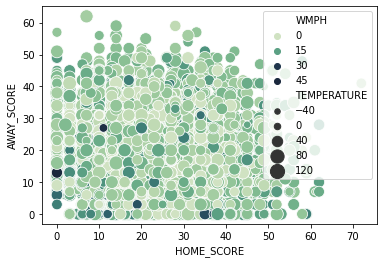

In [0]:
cmap = sns.cubehelix_palette(rot=-.5, as_cmap=True)
ax = sns.scatterplot(x="HOME_SCORE", y="AWAY_SCORE",
                     hue="WMPH", size="TEMPERATURE",
                     palette=cmap, sizes=(30, 200),
                     data=df)

#### The following six plots will give you a visualization of how all three aspects of this data set have had an effect on both the HOME and AWAY teams, and the eventual outcome of the game. WMPH(Wind MPH), Temperature and Humidity play a vital role. 

#### The first two graphs will show that the higher the wind, the lower the score is for both teams. And vice verse, the lower the wind, the higher the score is. You can see the curve starting to fall as winds reach in excess of 15mph. 

#### An intersting side note - where you see a solid vertical line at "0", just know that these are games that are played in indoor stadiums. You will see this in all three aspects: WPMH, TEMPERATURE and HUMIDITY.

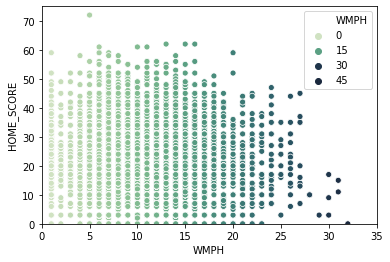

In [0]:
ax = sns.scatterplot(x="WMPH", y="HOME_SCORE", hue="WMPH", palette=cmap, data=df)
plt.axis((0,35,0,75))
plt.show()

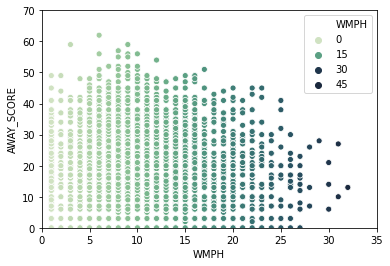

In [0]:
ax = sns.scatterplot(x="WMPH", y="AWAY_SCORE", hue="WMPH", palette=cmap, data=df)
plt.axis((0,35,0,70))
plt.show()

#### These next two graphs will show the difference between the HOME and AWAY data. You will notice that it doesn't seem to matter whether it is hot or cold, both sides tend to score less. You will notice that between 40* and 75* is where the points are scored on both sides of the ball. 

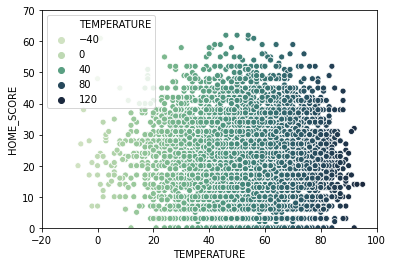

In [0]:
ax = sns.scatterplot(x="TEMPERATURE", y="HOME_SCORE", hue="TEMPERATURE", palette=cmap, data=df)
plt.axis((-20,100,0,70))
plt.show()

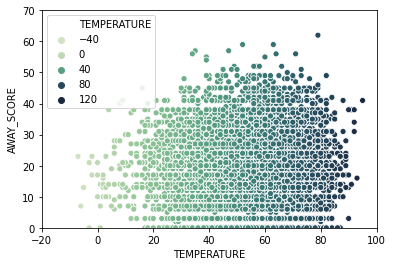

In [0]:
ax = sns.scatterplot(x="TEMPERATURE", y="AWAY_SCORE", hue="TEMPERATURE", palette=cmap, data=df)
plt.axis((-20,100,0,70))
plt.show()

#### Last but not least, there is Humidity. The thing most noticeable here is that the less percentage of humidity, there is no real difference in scoring. However, you will see that at around 70% humidity it has reached its peak and then begins to drop off. 

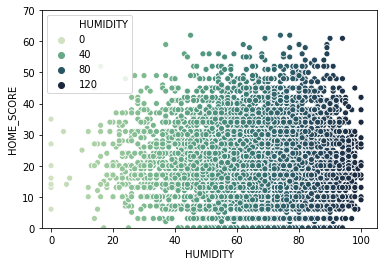

In [0]:
ax = sns.scatterplot(x="HUMIDITY", y="HOME_SCORE", hue="HUMIDITY", palette=cmap, data=df)
plt.axis((-3,105,0,70))
plt.show()

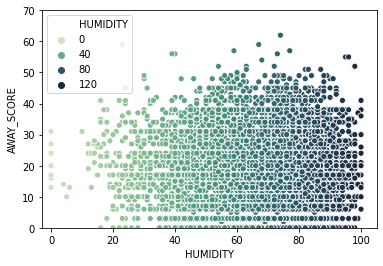

In [0]:
ax = sns.scatterplot(x="HUMIDITY", y="AWAY_SCORE", hue="HUMIDITY", palette=cmap, data=df)
plt.axis((-3,105,0,70))
plt.show()

#### The purpose of the next function is to add an additional column with the title "TOTAL_SCORE". This will allow you, the reader, to better understand the effect that weather has had on the game of football. This will take into consideration the total score of the game vs. WMPH, TEMPERATURE and HUMIDITY. 

In [0]:
df['TOTAL_SCORE'] = df['AWAY_SCORE'] + df['HOME_SCORE']

In [0]:
df.head()

,HOME_TEAM,HOME_SCORE,AWAY_TEAM,AWAY_SCORE,TEMPERATURE,HUMIDITY,WMPH,DATE,TOTAL_SCORE
0,Los Angeles Rams,21,St. Louis Cardinals,43,66,78.0,8.0,1960-09-23,64
1,Dallas Cowboys,28,Pittsburgh Steelers,35,72,80.0,16.0,1960-09-24,63
2,Green Bay Packers,14,Chicago Bears,17,60,76.0,13.0,1960-09-25,31
3,San Francisco 49ers,19,New York Giants,21,72,44.0,10.0,1960-09-25,40
4,Baltimore Colts,20,Washington Redskins,0,62,80.0,9.0,1960-09-25,20


In [0]:
df.tail()

,HOME_TEAM,HOME_SCORE,AWAY_TEAM,AWAY_SCORE,TEMPERATURE,HUMIDITY,WMPH,DATE,TOTAL_SCORE
11185,Cincinnati Bengals,34,Baltimore Ravens,17,43,93.0,3.0,2013-12-29,51
11187,New England Patriots,34,Buffalo Bills,20,39,100.0,8.0,2013-12-29,54
11189,Pittsburgh Steelers,20,Cleveland Browns,7,40,93.0,5.0,2013-12-29,27
11190,Oakland Raiders,14,Denver Broncos,34,70,16.0,8.0,2013-12-29,48
11191,Miami Dolphins,7,New York Jets,20,79,84.0,12.0,2013-12-29,27


#### As the comments show, you will see how each weather aspect has a direct effect on the game of football. 

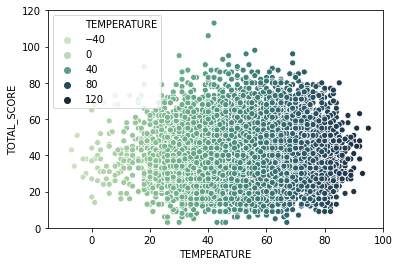

In [0]:
ax = sns.scatterplot(x="TEMPERATURE", y="TOTAL_SCORE", hue="TEMPERATURE", palette=cmap, data=df)
plt.axis((-15,100,0,120))
plt.show()

#### ^^^ What you are looking at here is the effect that TEMPERATURE has on the game of football. Looking closely at this graph you will see that the total score is effected more so as the temperature gets to freezing and below freezing; whereas, when you reach between 40 and 70 degrees the score peaks and then begins to drop as it reaches hotter temperatures. 

  * The greatest game of all time was my very first NFL game with my Grandfather in Cleveland, Ohio (Browns vs. Bengals). We weren't sure how long we'd last because it was the middle of winter and we were outside. I was a young boy and can more than just remember asking my Grandfather why they kept fumbling the ball and why the Quarterback kept throwing it to the other team. Some would argue that it's because they were the Browns, but at that time the temperature was about 28 degrees. The ball was hard and less flexible, the ground was hard, and the air was so dense because of it being cold that the ball didn't travel as well. 






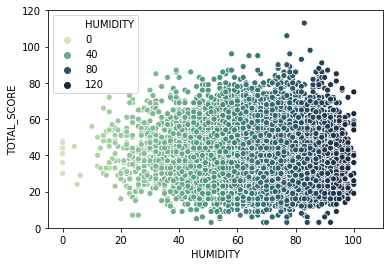

In [0]:
ax = sns.scatterplot(x="HUMIDITY", y="TOTAL_SCORE", hue="HUMIDITY", palette=cmap, data=df)
plt.axis((-5,110,0,120))
plt.show()

#### ^^^ As we take a look at the HUMIDITY graph, you will notice that the TOTAL_SCORE peaks between the ranges of 60 & 80%. At the peak of 80% the score begins to taper off as the HUMIDITY increases. 

  * I can remember my first Seahawks game, it was Adrian Peterson's rookie season. While it may have been a pre-season game, the humidity was more than a factor for both teams. The field was damp, the ball was wet and more pliable than usual. There were interceptions and Adrian's first fumble as an NFL athlete. 

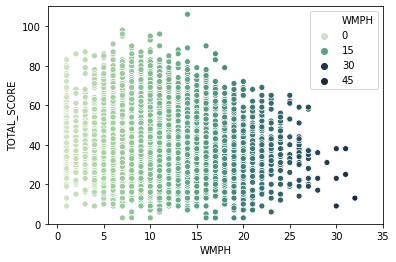

In [0]:
ax = sns.scatterplot(x="WMPH", y="TOTAL_SCORE", hue="WMPH", palette=cmap, data=df)
plt.axis((-1,35,0,110))
plt.show()

#### ^^^ One can never discard the Wind Miles Per Hour(WMPH). As noticed in the above graph, it is most consistent in showing the data on how Weather has had an effect on the game. At the peak of 10MPH, the total score of the game peaks at a high of almost 100pts between the two teams. As it reaches 15MPH, the score consistently drops off as the wind speed increases. 

## The game of football is just like a game of risk, it has its normal everyday challenges. Weather on the other hand has always; and will always, have an effect on the game of American football. Whether you are talking about it being too hot or too cold, verse the level of humidity from the rain or just living right on the ocean in the South East. Weather will ALWAYS have an effect on how the game is played, and how exciting it can be.  